<a href="https://colab.research.google.com/github/saddarudin/google_colab/blob/main/ml_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.shape

(150, 4)

In [7]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


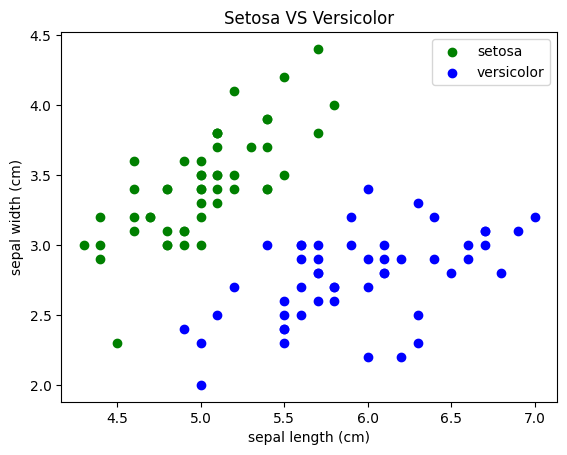

In [12]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Setosa VS Versicolor')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue')
plt.legend(iris.target_names)
plt.show()

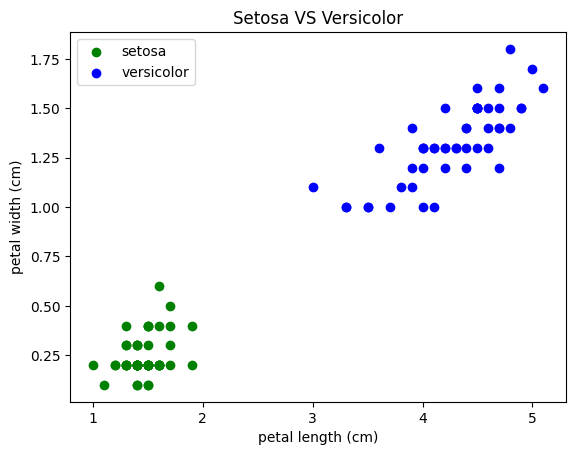

In [13]:
plt.title('Setosa VS Versicolor')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.legend(iris.target_names)
plt.show()

In [17]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(['target','flower_name'],axis='columns'),df.target,test_size=0.2,random_state=1)
x_train.shape,y_train.shape

((120, 4), (120,))

In [18]:
x_test.shape

(30, 4)

In [24]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [25]:
knn.score(x_test,y_test)

0.9666666666666667

In [27]:
y_predicted = knn.predict(x_test)
y_predicted[:5]

array([0, 1, 1, 0, 2])

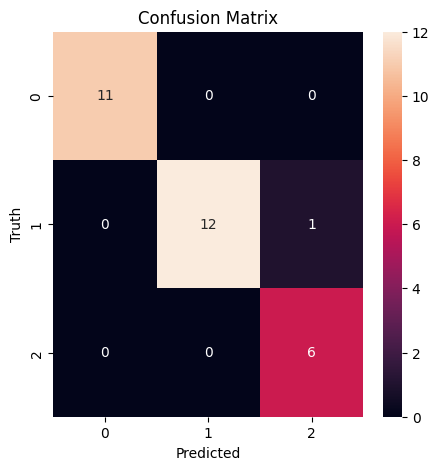

In [29]:
cm = confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [31]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### Exercise

In [32]:
from sklearn.datasets import load_digits

In [33]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [34]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [35]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [36]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [37]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2)
x_train.shape,x_test.shape

((1437, 64), (360, 64))

In [38]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
model.score(x_test,y_test)

0.9833333333333333

In [40]:
y_predicted = model.predict(x_test)
y_predicted[:5]

array([5, 7, 1, 8, 7])

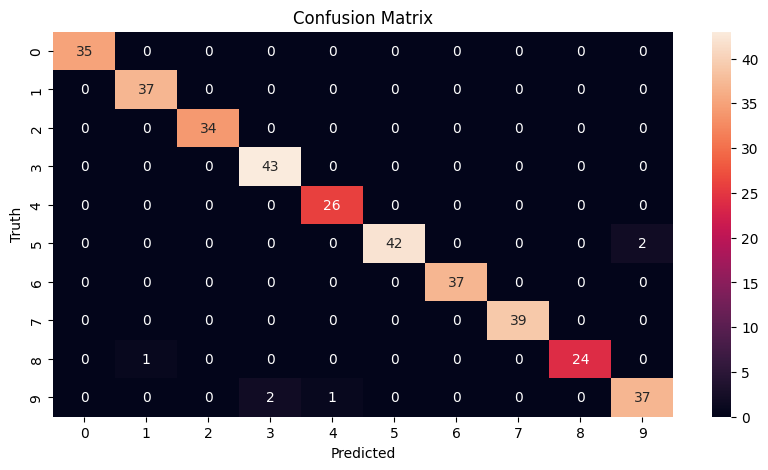

In [43]:
cm = confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [44]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        34
           3       0.96      1.00      0.98        43
           4       0.96      1.00      0.98        26
           5       1.00      0.95      0.98        44
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        39
           8       1.00      0.96      0.98        25
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

